<a href="https://colab.research.google.com/github/AzamChatrAzar/neumerical-datasets/blob/main/california_housing_new_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [4]:
# بارگذاری داده‌های مسکن کالیفرنیا
california_data = fetch_california_housing()

# تبدیل به دیتافریم pandas

data= pd.DataFrame(data=california_data.data, columns=california_data.feature_names)


In [8]:
data['target'] = california_data.target

In [9]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X = data.drop('target', axis=1)

y = data['target']  # ستون هدف


In [13]:
# تقسیم‌بندی داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13)


In [14]:
# ایجاد مدل KNN
k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
knn = KNeighborsRegressor(n_neighbors=k)

# آموزش مدل
knn.fit(X_train, y_train)

# پیش‌بینی
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
# محاسبه خطای میانگین مربعات
mse1 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error KNN Regression: {mse1}')
print(f'R2 Squared KNN Regression:{r2} ')

Mean Squared Error KNN Regression: 1.2794308821860971
R2 Squared KNN Regression:0.0560209846214107 


In [15]:
# ایجاد مدل رگرسیون خطی
linear_model = LinearRegression()

# آموزش مدل
linear_model.fit(X_train, y_train)

# پیش‌بینی
y_pred = linear_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred)
# محاسبه خطای میانگین مربعات
mse2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error linear Regression: {mse2}')

print(f'R2 Squared LinearRegression:{r2_lin} ')

Mean Squared Error linear Regression: 4.006122970351424e-27
R2 Squared LinearRegression:1.0 


In [16]:
# ایجاد مدل رگرسیون ریج
ridge_model = Ridge(alpha=1.0)

# آموزش مدل رگرسیون ریج
ridge_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون ریج
y_pred_ridge = ridge_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون ریج
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')
print(f'R2 Score RidgeRegression:{r2_ridge} ')

Mean Squared Error (Ridge Regression): 6.721729459452475e-09
R2 Score RidgeRegression:0.9999999950406296 


In [17]:
# ایجاد مدل رگرسیون لاسو
lasso_model = Lasso(alpha=1.0)

# آموزش مدل رگرسیون لاسو
lasso_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون لاسو
y_pred_lasso = lasso_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون لاسو
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso Regression): {mse_lasso}')
print(f'R2 Score LassoRegression:{r2_lasso} ')

Mean Squared Error (Lasso Regression): 0.782008930626911
R2 Score LassoRegression:0.42302469744271687 


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
target_col = 'target'  # ستون هدف (مقادیر عددی)
feature_cols = data.columns.drop([target_col])  # لیست ستون‌های ویژگی

# جدا کردن ویژگی‌ها و تارگت
X = data[feature_cols].values
y = data[target_col].values

# تقسیم داده به train و test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:


# لیست ذخیره پیش‌بینی‌های هر ویژگی برای هر نمونه تست
feature_predictions_per_test = []

# پردازش هر نمونه تست
for i in range(len(X_test)):
    # لیست ذخیره پیش‌بینی‌های هر ویژگی برای این نمونه تست
    single_test_feature_predictions = []

    # پردازش هر ویژگی به صورت جداگانه
    for feature_idx in range(X.shape[1]):
        # انتخاب فقط یک ویژگی از داده‌های آموزش
        X_train_feature = X_train_scaled[:, feature_idx].reshape(-1, 1)
        y_train_target = y_train

        # آموزش رگرسیون خطی روی این ویژگی
        lr = LinearRegression()
        lr.fit(X_train_feature, y_train_target)

        # پیش‌بینی برای این ویژگی در نمونه تست فعلی
        X_test_feature = X_test_scaled[i, feature_idx].reshape(1, -1)
        pred = lr.predict(X_test_feature)[0]
        single_test_feature_predictions.append(pred)

    # ذخیره بردار پیش‌بینی‌های این نمونه تست
    feature_predictions_per_test.append(single_test_feature_predictions)

# تبدیل لیست به آرایه numpy
feature_predictions_per_test = np.array(feature_predictions_per_test)




# MSE برای میانگین پیش‌بینی‌های هر ویژگی
mean_feature_predictions = np.mean(feature_predictions_per_test, axis=1)
mse_mean_features = mean_squared_error(y_test, mean_feature_predictions)
r2_mean_features = r2_score(y_test, mean_feature_predictions)




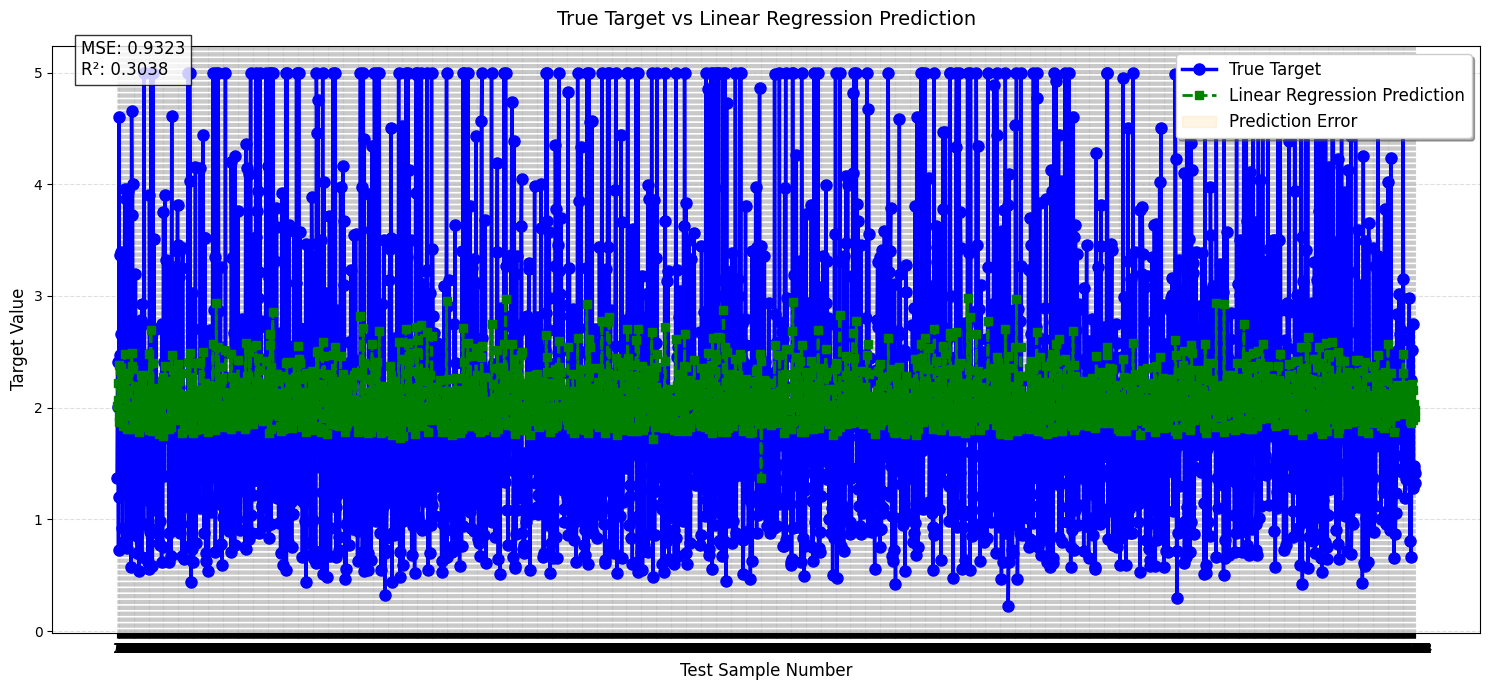

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات سبک نمودار

plt.figure(figsize=(15, 7))

# ایجاد داده برای نمودار
sample_numbers = np.arange(1, len(y_test)+1)
df_plot = pd.DataFrame({
    'Sample': sample_numbers,
    'True Target': y_test,
    'Linear Regression Prediction': mean_feature_predictions
})

# رسم نمودار خطی
plt.plot('Sample', 'True Target', data=df_plot,
         marker='o', markersize=8, linewidth=2.5,
         color='blue', label='True Target')

plt.plot('Sample', 'Linear Regression Prediction', data=df_plot,
         marker='s', markersize=6, linewidth=2, linestyle='--',
         color='green', label='Linear Regression Prediction')

# اضافه کردن خطاها به صورت نواری (اختیاری)
plt.fill_between(sample_numbers, y_test, mean_feature_predictions,
                 color='orange', alpha=0.1, label='Prediction Error')

# تنظیمات ظاهری
plt.title('True Target vs Linear Regression Prediction', fontsize=14, pad=15)
plt.xlabel('Test Sample Number', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.xticks(sample_numbers)
plt.grid(True, linestyle='--', alpha=0.4)

# نمایش مقدار MSE
# نمایش مقدار MSE و R-squared روی نمودار
plt.text(0.02, 0.95, f'MSE: {mse_mean_features:.4f}\nR²: {r2_mean_features:.4f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.legend(fontsize=12, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [31]:
target_col = 'target'  # ستون هدف (عددی)
feature_cols = data.columns.drop(target_col)  # لیست ویژگی‌ها

# آماده‌سازی داده‌ها
X = data[feature_cols].values
y = data[target_col].values


In [36]:
# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تعیین تعداد همسایه‌ها (k)
k = int(np.sqrt(len(X_train)))

In [37]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# لیست ذخیره پیش‌بینی‌های هر ویژگی برای هر نمونه تست
feature_preds = []

# پیش‌بینی هر ویژگی به صورت جداگانه با KNN رگرسیون
for i in range(X_test.shape[0]):
    sample_preds = []
    for feature_idx in range(X.shape[1]):
        # آموزش مدل روی یک ویژگی
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_scaled[:, feature_idx].reshape(-1, 1), y_train)

        # پیش‌بینی برای ویژگی فعلی
        pred = knn.predict(X_test_scaled[i, feature_idx].reshape(1, -1))[0]
        sample_preds.append(pred)
    feature_preds.append(sample_preds)

feature_preds = np.array(feature_preds)

# محاسبه پیش‌بینی نهایی (میانگین پیش‌بینی‌های ویژگی‌ها)
final_preds = np.mean(feature_preds, axis=1)

# محاسبه معیارهای ارزیابی
mse_final = mean_squared_error(y_test, final_preds)
r2_final = r2_score(y_test, final_preds)

print("نتایج ارزیابی مدل:")
print(f"MSE: {mse_final:.4f}")
print(f"R-squared: {r2_final:.4f}")



نتایج ارزیابی مدل:
MSE: 0.7531
R-squared: 0.4454


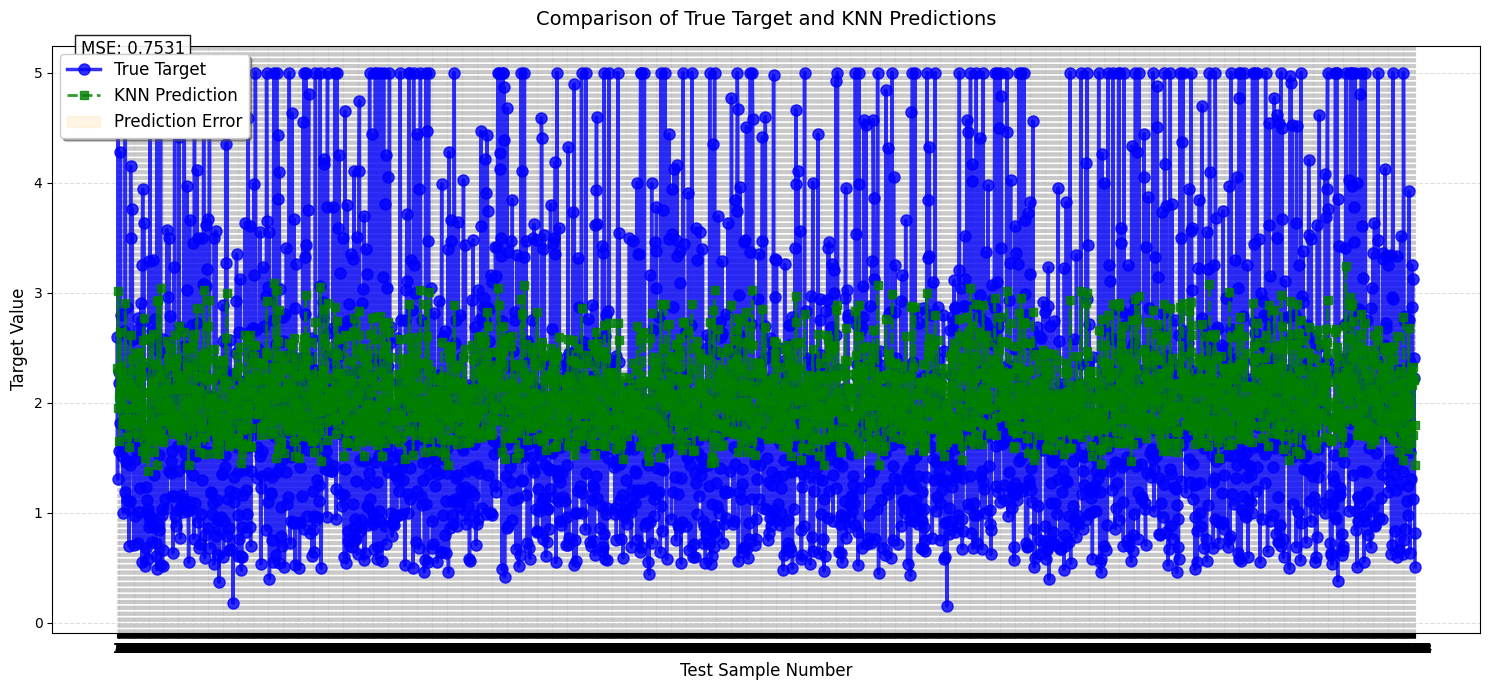

In [38]:
import seaborn as sns

# تنظیمات نمودار
plt.figure(figsize=(15, 7))

# ایجاد داده برای نمودار
sample_numbers = np.arange(1, len(y_test)+1)

# رسم مقادیر واقعی و پیش‌بینی شده
plt.plot(sample_numbers, y_test, 'o-', label='True Target',
         color='blue', markersize=8, linewidth=2.5, alpha=0.8)
plt.plot(sample_numbers, final_preds, 's--', label='KNN Prediction',
         color='green', markersize=6, linewidth=2, alpha=0.8)


plt.fill_between(sample_numbers, y_test, final_preds, color='orange', alpha=0.1, label='Prediction Error')

# تنظیمات ظاهری
plt.title('Comparison of True Target and KNN Predictions', fontsize=14, pad=15)
plt.xlabel('Test Sample Number', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.xticks(sample_numbers)
plt.grid(True, linestyle='--', alpha=0.4)

# نمایش مقدار MSE
plt.text(0.02, 0.95, f'MSE: {mse_final:.4f}\nR²: {r2_final:.4f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.9))


plt.legend(fontsize=12, frameon=True, shadow=True)

plt.tight_layout()
plt.show()